In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Read the dataset to the python environment.

In [2]:
df= pd.read_csv("E commerce shipping data.csv")
df

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
0,1,D,Flight,4,2,177,3,low,F,44,1233,1
1,2,F,Flight,4,5,216,2,low,M,59,3088,1
2,3,A,Flight,2,2,183,4,low,M,48,3374,1
3,4,B,Flight,3,3,176,4,medium,M,10,1177,1
4,5,C,Flight,2,2,184,3,medium,F,46,2484,1
...,...,...,...,...,...,...,...,...,...,...,...,...
10994,10995,A,Ship,4,1,252,5,medium,F,1,1538,1
10995,10996,B,Ship,4,1,232,5,medium,F,6,1247,0
10996,10997,C,Ship,5,4,242,5,low,F,4,1155,0
10997,10998,F,Ship,5,2,223,6,medium,M,2,1210,0


In [3]:
df.head()

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
0,1,D,Flight,4,2,177,3,low,F,44,1233,1
1,2,F,Flight,4,5,216,2,low,M,59,3088,1
2,3,A,Flight,2,2,183,4,low,M,48,3374,1
3,4,B,Flight,3,3,176,4,medium,M,10,1177,1
4,5,C,Flight,2,2,184,3,medium,F,46,2484,1


In [4]:
df.tail()

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
10994,10995,A,Ship,4,1,252,5,medium,F,1,1538,1
10995,10996,B,Ship,4,1,232,5,medium,F,6,1247,0
10996,10997,C,Ship,5,4,242,5,low,F,4,1155,0
10997,10998,F,Ship,5,2,223,6,medium,M,2,1210,0
10998,10999,D,Ship,2,5,155,5,low,F,6,1639,0


# 2.Preprocessing
Basic details of the dataset

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10999 entries, 0 to 10998
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ID                   10999 non-null  int64 
 1   Warehouse_block      10999 non-null  object
 2   Mode_of_Shipment     10999 non-null  object
 3   Customer_care_calls  10999 non-null  int64 
 4   Customer_rating      10999 non-null  int64 
 5   Cost_of_the_Product  10999 non-null  int64 
 6   Prior_purchases      10999 non-null  int64 
 7   Product_importance   10999 non-null  object
 8   Gender               10999 non-null  object
 9   Discount_offered     10999 non-null  int64 
 10  Weight_in_gms        10999 non-null  int64 
 11  Reached.on.Time_Y.N  10999 non-null  int64 
dtypes: int64(8), object(4)
memory usage: 1.0+ MB


In [6]:
df.isna().sum()

ID                     0
Warehouse_block        0
Mode_of_Shipment       0
Customer_care_calls    0
Customer_rating        0
Cost_of_the_Product    0
Prior_purchases        0
Product_importance     0
Gender                 0
Discount_offered       0
Weight_in_gms          0
Reached.on.Time_Y.N    0
dtype: int64

In [7]:
df.shape

(10999, 12)

In [8]:
df.describe(include='all')

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
count,10999.00000,10999,10999,10999.000000,10999.000000,10999.000000,10999.000000,10999,10999,10999.000000,10999.000000,10999.000000
unique,NaN,5,3,NaN,NaN,NaN,NaN,3,2,NaN,NaN,NaN
top,NaN,F,Ship,NaN,NaN,NaN,NaN,low,F,NaN,NaN,NaN
freq,NaN,3666,7462,NaN,NaN,NaN,NaN,5297,5545,NaN,NaN,NaN
mean,5500.00000,NaN,NaN,4.054459,2.990545,210.196836,3.567597,NaN,NaN,13.373216,3634.016729,0.596691
std,3175.28214,NaN,NaN,1.141490,1.413603,48.063272,1.522860,NaN,NaN,16.205527,1635.377251,0.490584
min,1.00000,NaN,NaN,2.000000,1.000000,96.000000,2.000000,NaN,NaN,1.000000,1001.000000,0.000000
25%,2750.50000,NaN,NaN,3.000000,2.000000,169.000000,3.000000,NaN,NaN,4.000000,1839.500000,0.000000
50%,5500.00000,NaN,NaN,4.000000,3.000000,214.000000,3.000000,NaN,NaN,7.000000,4149.000000,1.000000
75%,8249.50000,NaN,NaN,5.000000,4.000000,251.000000,4.000000,NaN,NaN,10.000000,5050.000000,1.000000


In [9]:
df.columns

Index(['ID', 'Warehouse_block', 'Mode_of_Shipment', 'Customer_care_calls',
       'Customer_rating', 'Cost_of_the_Product', 'Prior_purchases',
       'Product_importance', 'Gender', 'Discount_offered', 'Weight_in_gms',
       'Reached.on.Time_Y.N'],
      dtype='object')

# Outliers

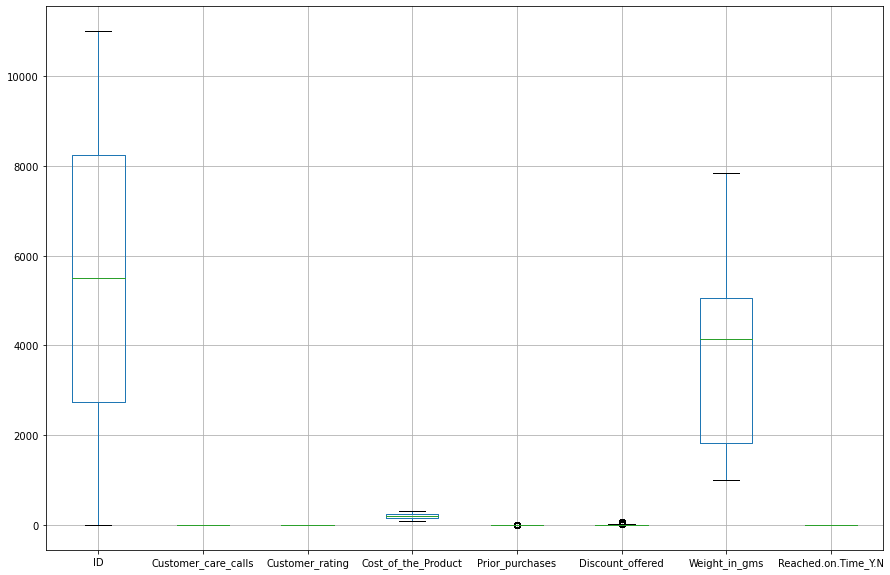

In [10]:
plt.figure(figsize=(15,10))
df.boxplot()
plt.show()

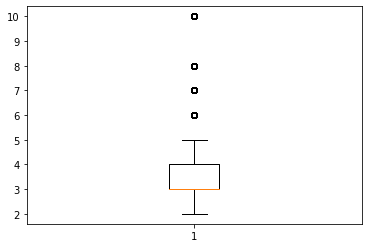

In [11]:
plt.boxplot(df['Prior_purchases'])
plt.show()

In [12]:
#checking outlier for numerical features in our dataset
outlier_detection=df[['Customer_care_calls','Customer_rating','Cost_of_the_Product','Prior_purchases','Discount_offered','Weight_in_gms']]
outlier_detection

,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Discount_offered,Weight_in_gms
0,4,2,177,3,44,1233
1,4,5,216,2,59,3088
2,2,2,183,4,48,3374
3,3,3,176,4,10,1177
4,2,2,184,3,46,2484
...,...,...,...,...,...,...
10994,4,1,252,5,1,1538
10995,4,1,232,5,6,1247
10996,5,4,242,5,4,1155
10997,5,2,223,6,2,1210


In [13]:
#creating a function to check outlier on each variables
def IQR_values(dataframe,column_name):
    q1=dataframe[column_name].quantile(0.25)
    q2=dataframe[column_name].quantile(0.50)
    q3=dataframe[column_name].quantile(0.75)
    IQR=q3-q1 
    lower_limit=q1-1.5*IQR
    upper_limit=q3+1.5*IQR
    return lower_limit,upper_limit
columns=['Customer_care_calls','Customer_rating','Cost_of_the_Product','Prior_purchases','Discount_offered','Weight_in_gms'] #checking outlier in these columns
outlier={}
for i in columns:
    lower_limit,upper_limit=IQR_values(outlier_detection,i)
    outlier[i]=[lower_limit,upper_limit]



In [14]:
outlier

{'Customer_care_calls': [0.0, 8.0],
 'Customer_rating': [-1.0, 7.0],
 'Cost_of_the_Product': [46.0, 374.0],
 'Prior_purchases': [1.5, 5.5],
 'Discount_offered': [-5.0, 19.0],
 'Weight_in_gms': [-2976.25, 9865.75]}

In [15]:
Customer_care_calls_outlier=(df['Customer_care_calls']<outlier['Customer_care_calls'][0])|(df['Customer_care_calls']>outlier['Customer_care_calls'][1])
df.loc[Customer_care_calls_outlier].index

Int64Index([], dtype='int64')

In [16]:
Customer_rating_outlier=(df['Customer_rating']<outlier['Customer_rating'][0])|(df['Customer_rating']>outlier['Customer_rating'][1])
df.loc[Customer_rating_outlier].index

Int64Index([], dtype='int64')

In [17]:
Cost_of_the_Product=(df['Cost_of_the_Product']<outlier['Cost_of_the_Product'][0])|(df['Cost_of_the_Product']>outlier['Cost_of_the_Product'][1])
df.loc[Cost_of_the_Product].index

Int64Index([], dtype='int64')

In [18]:
Prior_purchases_outlier=(df['Prior_purchases']<outlier['Prior_purchases'][0])|(df['Prior_purchases']>outlier['Prior_purchases'][1])
Prior_purchases_outlier=df.loc[Prior_purchases_outlier].index
Prior_purchases_outlier

Int64Index([   37,    62,    74,    90,   133,   180,   182,   183,   226,
              228,
            ...
            10958, 10959, 10963, 10967, 10970, 10981, 10983, 10990, 10993,
            10997],
           dtype='int64', length=1003)

In [19]:
df.drop(Prior_purchases_outlier,inplace=True)

In [20]:
Discount_offered_outlier=(df['Discount_offered']<outlier['Discount_offered'][0])|(df['Discount_offered']>outlier['Discount_offered'][1])
Discount_offered_outlier=df.loc[Discount_offered_outlier].index
Discount_offered_outlier

Int64Index([   0,    1,    2,    4,    7,    9,   11,   13,   14,   15,
            ...
            3122, 3123, 3124, 3125, 3126, 3128, 3130, 3131, 3132, 3133],
           dtype='int64', length=2025)

In [21]:
df.drop(Discount_offered_outlier,inplace=True)

In [22]:
Weight_in_gms_outlier=(df['Weight_in_gms']<outlier['Weight_in_gms'][0])|(df['Weight_in_gms']>outlier['Weight_in_gms'][1])
df.loc[Weight_in_gms_outlier].index

Int64Index([], dtype='int64')

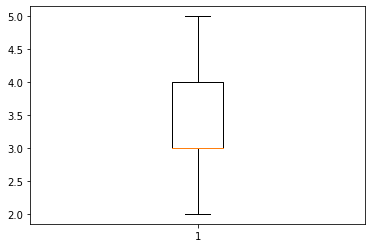

In [23]:
#Boxplot of 'SW'
plt.boxplot(df['Prior_purchases'])
plt.show()

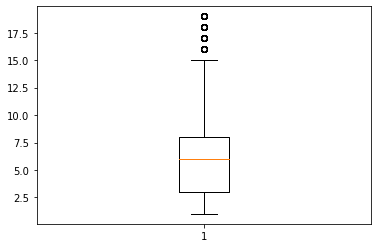

In [24]:
plt.boxplot(df['Discount_offered'])
plt.show()

In [25]:
#final shape of our data 
df.shape

(7971, 12)

# Encoding
Label Encoding on Mode of Shipment and Product importance

In [26]:
#Let us do label encoding to our object data type variables
#let us do label encoding on mode of shipment and product importance
from sklearn.preprocessing import LabelEncoder
label_encoder=LabelEncoder()

In [27]:
df['Mode_of_Shipment']=label_encoder.fit_transform(df['Mode_of_Shipment'])
df['Product_importance']=label_encoder.fit_transform(df['Product_importance'])

In [28]:
#One Hot Encoding on Gender and Warehouse block


In [29]:
df=pd.get_dummies(df)
df

,ID,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N,Warehouse_block_A,Warehouse_block_B,Warehouse_block_C,Warehouse_block_D,Warehouse_block_F,Gender_F,Gender_M
3,4,0,3,3,176,4,2,10,1177,1,0,1,0,0,0,0,1
5,6,0,3,1,162,3,2,12,1417,1,0,0,0,0,1,1,0
6,7,0,3,4,250,3,1,3,2371,1,0,0,0,1,0,1,0
8,9,0,3,4,150,3,1,11,1861,1,1,0,0,0,0,1,0
10,11,0,3,4,189,2,2,12,2888,1,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10992,10993,2,5,1,236,5,2,3,1906,0,0,0,0,1,0,0,1
10994,10995,2,4,1,252,5,2,1,1538,1,1,0,0,0,0,1,0
10995,10996,2,4,1,232,5,2,6,1247,0,0,1,0,0,0,1,0
10996,10997,2,5,4,242,5,1,4,1155,0,0,0,1,0,0,1,0


In [30]:


#Now, we have converted all object data types into numerical data types

#Let us remove ID column from our dataset which is a unique number like an index number to our dataset

In [31]:
df.drop('ID',axis=1,inplace=True)

In [32]:
df

,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N,Warehouse_block_A,Warehouse_block_B,Warehouse_block_C,Warehouse_block_D,Warehouse_block_F,Gender_F,Gender_M
3,0,3,3,176,4,2,10,1177,1,0,1,0,0,0,0,1
5,0,3,1,162,3,2,12,1417,1,0,0,0,0,1,1,0
6,0,3,4,250,3,1,3,2371,1,0,0,0,1,0,1,0
8,0,3,4,150,3,1,11,1861,1,1,0,0,0,0,1,0
10,0,3,4,189,2,2,12,2888,1,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10992,2,5,1,236,5,2,3,1906,0,0,0,0,1,0,0,1
10994,2,4,1,252,5,2,1,1538,1,1,0,0,0,0,1,0
10995,2,4,1,232,5,2,6,1247,0,0,1,0,0,0,1,0
10996,2,5,4,242,5,1,4,1155,0,0,0,1,0,0,1,0


# Feature Scaling
Standardization

In [33]:
from sklearn.preprocessing import StandardScaler
std_scaler=StandardScaler()

In [34]:
df_std=pd.DataFrame(std_scaler.fit_transform(df),columns=df.columns)
df_std

,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N,Warehouse_block_A,Warehouse_block_B,Warehouse_block_C,Warehouse_block_D,Warehouse_block_F,Gender_F,Gender_M
0,-1.991753,-0.962141,0.004527,-0.781413,0.724174,1.052009,1.131258,-1.716621,1.009707,-0.451751,2.241639,-0.447517,-0.449938,-0.700729,-1.002386,1.002386
1,-1.991753,-0.962141,-1.410633,-1.071699,-0.284632,1.052009,1.695047,-1.568407,1.009707,-0.451751,-0.446102,-0.447517,-0.449938,1.427085,0.997619,-0.997619
2,-1.991753,-0.962141,0.712107,0.752955,-0.284632,-0.568077,-0.842007,-0.979258,1.009707,-0.451751,-0.446102,-0.447517,2.222531,-0.700729,0.997619,-0.997619
3,-1.991753,-0.962141,0.712107,-1.320516,-0.284632,-0.568077,1.413152,-1.294212,1.009707,2.213611,-0.446102,-0.447517,-0.449938,-0.700729,0.997619,-0.997619
4,-1.991753,-0.962141,0.712107,-0.511862,-1.293438,1.052009,1.695047,-0.659981,1.009707,-0.451751,-0.446102,2.234554,-0.449938,-0.700729,-1.002386,1.002386
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7966,0.638945,0.736281,-1.410633,0.462669,1.732979,1.052009,-0.842007,-1.266422,-0.990386,-0.451751,-0.446102,-0.447517,2.222531,-0.700729,-1.002386,1.002386
7967,0.638945,-0.112930,-1.410633,0.794425,1.732979,1.052009,-1.405797,-1.493682,1.009707,2.213611,-0.446102,-0.447517,-0.449938,-0.700729,0.997619,-0.997619
7968,0.638945,-0.112930,-1.410633,0.379731,1.732979,1.052009,0.003678,-1.673392,-0.990386,-0.451751,2.241639,-0.447517,-0.449938,-0.700729,0.997619,-0.997619
7969,0.638945,0.736281,0.712107,0.587078,1.732979,-0.568077,-0.560112,-1.730207,-0.990386,-0.451751,-0.446102,2.234554,-0.449938,-0.700729,0.997619,-0.997619


In [35]:
from sklearn import preprocessing
df_norma=pd.DataFrame(preprocessing.normalize(df),columns=df.columns)
df_norma

,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N,Warehouse_block_A,Warehouse_block_B,Warehouse_block_C,Warehouse_block_D,Warehouse_block_F,Gender_F,Gender_M
0,0.000000,0.002521,0.002521,0.147881,0.003361,0.001680,0.008402,0.988955,0.000840,0.000000,0.000840,0.000000,0.000000,0.000000,0.000000,0.000840
1,0.000000,0.002103,0.000701,0.113581,0.002103,0.001402,0.008413,0.993487,0.000701,0.000000,0.000000,0.000000,0.000000,0.000701,0.000701,0.000000
2,0.000000,0.001258,0.001678,0.104859,0.001258,0.000419,0.001258,0.994483,0.000419,0.000000,0.000000,0.000000,0.000419,0.000000,0.000419,0.000000
3,0.000000,0.001607,0.002142,0.080339,0.001607,0.000536,0.005892,0.996745,0.000536,0.000536,0.000000,0.000000,0.000000,0.000000,0.000536,0.000000
4,0.000000,0.001037,0.001382,0.065303,0.000691,0.000691,0.004146,0.997855,0.000346,0.000000,0.000000,0.000346,0.000000,0.000000,0.000000,0.000346
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7966,0.001041,0.002603,0.000521,0.122880,0.002603,0.001041,0.001562,0.992412,0.000000,0.000000,0.000000,0.000000,0.000521,0.000000,0.000000,0.000521
7967,0.001283,0.002567,0.000642,0.161691,0.003208,0.001283,0.000642,0.986830,0.000642,0.000642,0.000000,0.000000,0.000000,0.000000,0.000642,0.000000
7968,0.001577,0.003153,0.000788,0.182903,0.003942,0.001577,0.004730,0.983103,0.000000,0.000000,0.000788,0.000000,0.000000,0.000000,0.000788,0.000000
7969,0.001695,0.004237,0.003389,0.205064,0.004237,0.000847,0.003389,0.978716,0.000000,0.000000,0.000000,0.000847,0.000000,0.000000,0.000847,0.000000


# Exploratory Data Analysis¶

In [36]:
df.columns

Index(['Mode_of_Shipment', 'Customer_care_calls', 'Customer_rating',
       'Cost_of_the_Product', 'Prior_purchases', 'Product_importance',
       'Discount_offered', 'Weight_in_gms', 'Reached.on.Time_Y.N',
       'Warehouse_block_A', 'Warehouse_block_B', 'Warehouse_block_C',
       'Warehouse_block_D', 'Warehouse_block_F', 'Gender_F', 'Gender_M'],
      dtype='object')

In [37]:
df

,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N,Warehouse_block_A,Warehouse_block_B,Warehouse_block_C,Warehouse_block_D,Warehouse_block_F,Gender_F,Gender_M
3,0,3,3,176,4,2,10,1177,1,0,1,0,0,0,0,1
5,0,3,1,162,3,2,12,1417,1,0,0,0,0,1,1,0
6,0,3,4,250,3,1,3,2371,1,0,0,0,1,0,1,0
8,0,3,4,150,3,1,11,1861,1,1,0,0,0,0,1,0
10,0,3,4,189,2,2,12,2888,1,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10992,2,5,1,236,5,2,3,1906,0,0,0,0,1,0,0,1
10994,2,4,1,252,5,2,1,1538,1,1,0,0,0,0,1,0
10995,2,4,1,232,5,2,6,1247,0,0,1,0,0,0,1,0
10996,2,5,4,242,5,1,4,1155,0,0,0,1,0,0,1,0


# Univariate analysis

In [38]:
#TAKING ONE FEATURE FOR DATA ANALYSIS .DISPLOT shows the distribution of a univariate set of obserations.



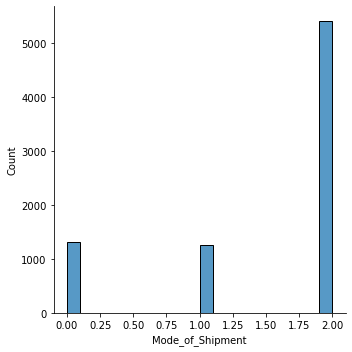

In [39]:
sns.displot(df['Mode_of_Shipment'])

# bivariate analysis

# wecan use jointplot()
joint plot allows you to basically match up two displots for a bivariate data with our choice of what kind of parameter to compare with:scatter,reg,resid,kde,hex..etc

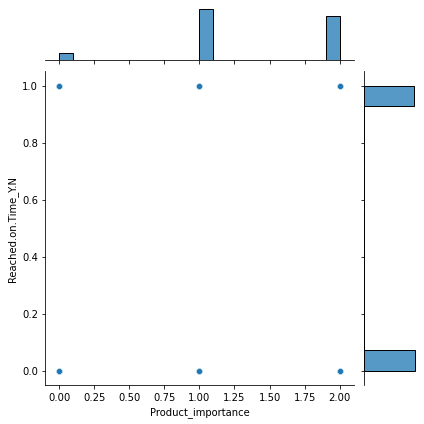

In [40]:
sns_plot = sns.jointplot(x='Product_importance',y='Reached.on.Time_Y.N',data=df,kind='scatter')

# or lets check if there is any correlation between any 


In [41]:
df

,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N,Warehouse_block_A,Warehouse_block_B,Warehouse_block_C,Warehouse_block_D,Warehouse_block_F,Gender_F,Gender_M
3,0,3,3,176,4,2,10,1177,1,0,1,0,0,0,0,1
5,0,3,1,162,3,2,12,1417,1,0,0,0,0,1,1,0
6,0,3,4,250,3,1,3,2371,1,0,0,0,1,0,1,0
8,0,3,4,150,3,1,11,1861,1,1,0,0,0,0,1,0
10,0,3,4,189,2,2,12,2888,1,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10992,2,5,1,236,5,2,3,1906,0,0,0,0,1,0,0,1
10994,2,4,1,252,5,2,1,1538,1,1,0,0,0,0,1,0
10995,2,4,1,232,5,2,6,1247,0,0,1,0,0,0,1,0
10996,2,5,4,242,5,1,4,1155,0,0,0,1,0,0,1,0


<AxesSubplot:xlabel='Customer_rating', ylabel='Prior_purchases'>

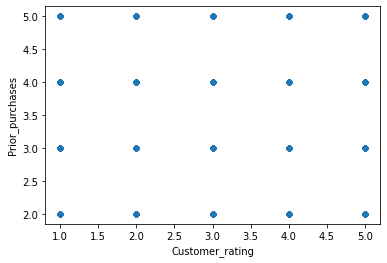

In [42]:
df.plot.scatter('Customer_rating','Prior_purchases')

In [43]:
df['Customer_rating'].corr(df['Prior_purchases'])#continous-continous

0.0030796176766948423

In [43]:

#In the above we can see that there is no sort of correlation between them.

In [44]:
df.groupby('Gender_F')['Prior_purchases'].mean()#categorical-continous

Gender_F
0    3.270121
1    3.294118
Name: Prior_purchases, dtype: float64

<AxesSubplot:xlabel='Gender_F'>

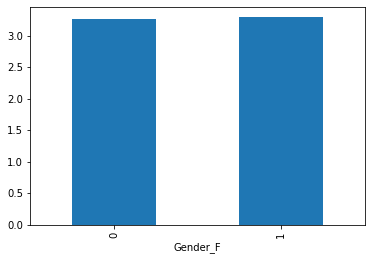

In [45]:
df.groupby('Gender_F')['Prior_purchases'].mean().plot.bar()

In [46]:
from scipy.stats import ttest_ind

In [47]:
males = df[df['Gender_M']=='M']
female= df[df['Gender_F']=='F']

In [48]:
ttest_ind(males['Prior_purchases'],female['Prior_purchases'],nan_policy='omit')

Ttest_indResult(statistic=nan, pvalue=nan)

In [49]:
#here p value we calculated is less than o.5 ie mean of prior purchases of both male and female is different

In [50]:
 pd.crosstab(df['Mode_of_Shipment'],df['Gender_F'])#categorical -categorical analysis

Gender_F,0,1
Mode_of_Shipment,,
0,680,628
1,614,642
2,2682,2725


In [51]:
from scipy.stats import chi2_contingency

In [52]:
chi2_contingency(pd.crosstab(df['Mode_of_Shipment'],df['Gender_F']))

(2.988174034486036,
 0.2244534333281928,
 2,
 array([[ 652.44109898,  655.55890102],
        [ 626.50307364,  629.49692636],
        [2697.05582737, 2709.94417263]]))

# MODELLING AND MODEL FINE TUNING

In [53]:
#classification model on the dataset

In [55]:
df.head()

,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N,Warehouse_block_A,Warehouse_block_B,Warehouse_block_C,Warehouse_block_D,Warehouse_block_F,Gender_F,Gender_M
3,0,3,3,176,4,2,10,1177,1,0,1,0,0,0,0,1
5,0,3,1,162,3,2,12,1417,1,0,0,0,0,1,1,0
6,0,3,4,250,3,1,3,2371,1,0,0,0,1,0,1,0
8,0,3,4,150,3,1,11,1861,1,1,0,0,0,0,1,0
10,0,3,4,189,2,2,12,2888,1,0,0,1,0,0,0,1


In [56]:
df['Reached.on.Time_Y.N'].value_counts()

0    4024
1    3947
Name: Reached.on.Time_Y.N, dtype: int64

In [57]:
df['Reached.on.Time_Y.N'].value_counts(normalize=True)

0    0.50483
1    0.49517
Name: Reached.on.Time_Y.N, dtype: float64

In [58]:
x=df.drop(['Reached.on.Time_Y.N'],axis=1)

In [59]:
y=df['Reached.on.Time_Y.N']

In [60]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test= train_test_split(x,y,random_state=42,test_size=0.2)

In [61]:
x_train.shape

(6376, 15)

# logistic regression model

In [62]:
from sklearn.linear_model import LogisticRegression
logit_model = LogisticRegression()
logit_model.fit(x_train,y_train)
y_pred = logit_model.predict(x_test)

In [63]:
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score,f1_score

In [64]:
print("accuracy is:", accuracy_score(y_test,y_pred))
print("precicion is:", precision_score(y_test,y_pred))
print("recall is:" ,recall_score(y_test,y_pred))
print("f1 score is:", f1_score(y_test,y_pred))

accuracy is: 0.5529780564263322
precicion is: 0.5631349782293179
recall is: 0.485
f1 score is: 0.5211551376762928


In [65]:
confusion_matrix(y_test,y_pred)

array([[494, 301],
       [412, 388]], dtype=int64)

# DECISION TREE MODEL

In [66]:
from sklearn.tree import DecisionTreeClassifier

In [67]:
dt_model = DecisionTreeClassifier()

In [68]:
dt_model.fit(x_train,y_train)

DecisionTreeClassifier()

In [69]:
y_pred= dt_model.predict(x_test)

In [70]:
print('Accuracy on decision model is :',accuracy_score(y_test,y_pred))

Accuracy on decision model is : 0.5567398119122257


In [71]:
y_test.value_counts()

1    800
0    795
Name: Reached.on.Time_Y.N, dtype: int64

In [72]:
confusion_matrix(y_test,y_pred)

array([[443, 352],
       [355, 445]], dtype=int64)

# svm model

In [73]:
from sklearn.svm import SVC
svm_poly = SVC(kernel='poly',degree=3)

# ##polynomial svm

In [74]:
svm_poly.fit(x_train,y_train)

SVC(kernel='poly')

In [75]:
y_pred = svm_poly.predict(x_test)

In [76]:
print('Accuracy using svm model is ',accuracy_score(y_test,y_pred))

Accuracy using svm model is  0.5686520376175549


# fine tuning logistic regression model

In [77]:
parameters = {
    'penalty' : ['l1','l2','elasticnet','none'], 
    'C'       : np.logspace(-4,4,20),
    'solver'  : ['newton-cg', 'lbfgs', 'liblinear'],}

In [78]:
from sklearn.model_selection import GridSearchCV

In [79]:
clf = GridSearchCV(logit_model,                    # model
                   param_grid = parameters,   # hyperparameters
                  cv=3,verbose=True,n_jobs=1)                

In [ ]:
best_clf = clf.fit(x_train,y_train)

In [81]:
best_clf.best_estimator_

LogisticRegression(C=0.0006951927961775605, penalty='l1', solver='liblinear')

In [82]:
print(f'accuracy - :{best_clf.score(x_train,y_train): .3f}')

accuracy - : 0.577


# Tuning svm

In [83]:
from sklearn.model_selection import GridSearchCV

In [84]:
param_grid = {'C': [0.1,1, 10, 100], 'gamma': [1,0.1,0.01,0.001],'kernel': ['rbf', 'poly', 'sigmoid']}

In [ ]:
grid = GridSearchCV(svm_poly (),param_grid,refit=True,verbose=2)
grid.fit(x_train,y_train)

In [ ]:
print(grid.best_estimator_)

In [ ]:
grid_predictions = grid.predict(x_test)
print(confusion_matrix(y_test,grid_predictions))
print(classification_report(y_test,grid_predictions))


# decision tree model

In [ ]:
from sklearn.model_selection import GridSearchCV


In [ ]:
tuning_model=GridSearchCV(reg_decision_model,param_grid=parameters,scoring='neg_mean_squared_error',cv=3,verbose=3)